In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from seminartools.data import read_inflation
from seminartools.models.pca_var_model import PCAVARModel

# 1. Read data

In [3]:
df_inflation = read_inflation()
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
8537,ESP,184,Spain,1970-04-01,0.000000
11635,GTM,258,Guatemala,1970-04-01,0.012577
1231,AUS,193,Australia,1970-04-01,0.011236
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
21697,NZL,196,New Zealand,1970-04-01,0.015421
...,...,...,...,...,...
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
15095,JPN,158,Japan,2023-01-01,0.004500
14347,ITA,136,Italy,2023-01-01,0.003938
21470,NOR,142,Norway,2023-01-01,0.006886


# 2. AR model per country

In [5]:
model = PCAVARModel(num_pcs=2, lags = [1, 2, 3, 4], standardize_pre_post = True)
model

In [6]:
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
8537,ESP,184,Spain,1970-04-01,0.000000
11635,GTM,258,Guatemala,1970-04-01,0.012577
1231,AUS,193,Australia,1970-04-01,0.011236
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
21697,NZL,196,New Zealand,1970-04-01,0.015421
...,...,...,...,...,...
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
15095,JPN,158,Japan,2023-01-01,0.004500
14347,ITA,136,Italy,2023-01-01,0.003938
21470,NOR,142,Norway,2023-01-01,0.006886


In [7]:
df_inflation.pivot(
    index = "yearmonth",
    columns = "Country",
    values = "inflation"
)

Country,Argentina,Australia,Austria,Belgium,Canada,Colombia,Cyprus,Denmark,Dominican Republic,Fiji,...,Portugal,Singapore,South Africa,Spain,Sweden,Switzerland,Thailand,Turkey,United Kingdom,United States
yearmonth,,,,,,,,,,,,,,,,,,,,,
1970-04-01,0.028380,0.011236,0.008889,0.005236,0.000000,0.000000,0.004670,0.015152,-0.001604,0.003524,...,0.000000,-0.006706,0.058824,0.000000,0.015504,0.008982,-0.004678,0.012093,0.024390,0.016667
1970-07-01,0.034397,0.011111,0.013216,0.010417,0.012500,0.000000,0.021692,0.029851,-0.008031,0.007902,...,0.000000,0.008439,0.000000,0.042553,0.015267,0.011869,-0.000881,0.013470,0.011905,0.011216
1970-10-01,0.109245,0.021978,0.008696,0.005155,-0.006173,0.000000,0.006673,0.014493,0.016516,0.021777,...,0.058824,0.001674,0.000000,0.020408,0.015038,0.020528,-0.002352,0.041157,0.011765,0.013652
1971-01-01,0.093037,0.010753,0.012931,0.010256,0.006211,0.000000,0.008436,0.000000,-0.021344,0.027280,...,0.000000,0.016708,0.055556,0.020000,0.037037,0.020115,-0.000589,0.042001,0.034884,0.007576
1971-04-01,0.054657,0.010638,0.008511,0.015228,0.012346,0.000000,0.008366,0.021429,0.039714,0.004979,...,0.055556,-0.013147,0.000000,0.019608,0.000000,0.014085,-0.000295,0.049200,0.033708,0.010860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,0.132548,0.021295,0.020300,0.033275,0.020211,0.037867,0.009326,0.021536,0.028900,0.034391,...,0.015094,0.016682,0.014892,0.020852,0.016158,0.007859,0.019048,0.282867,0.012270,0.022835
2022-04-01,0.182078,0.017376,0.031142,0.016949,0.031008,0.032018,0.049593,0.032997,0.022648,0.011465,...,0.050186,0.019820,0.023478,0.032860,0.032686,0.015595,0.023886,0.169374,0.036364,0.029738
2022-07-01,0.206391,0.017933,0.026846,0.025000,0.008354,0.024531,0.018325,0.023957,0.013293,0.007368,...,0.010619,0.019274,0.027957,0.012038,0.030796,0.006718,0.010083,0.088515,0.017544,0.013147


In [8]:
model.fit(df_inflation)

Text(0.5, 1.0, 'Fraction of variance explained by each principal component')

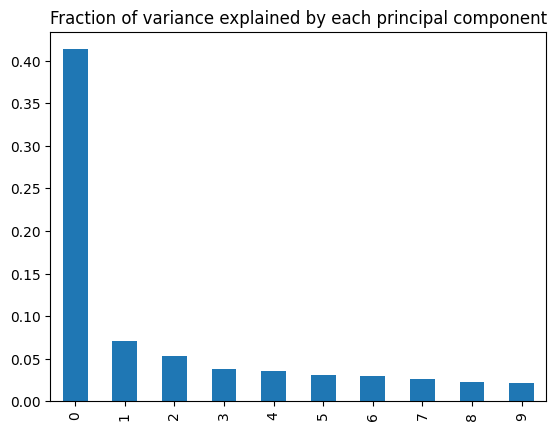

In [9]:
import matplotlib.pyplot as plt

pd.Series(model.all_eigenvalues).pipe(lambda x: x / x.sum()).head(10).plot.bar()
plt.title("Fraction of variance explained by each principal component")

In [10]:
(model.all_eigenvalues[0] + model.all_eigenvalues[1]) / sum(model.all_eigenvalues)

0.4835895787368026

PC1 and PC2 seem to combine 95% of the variance in inflation together.

<Axes: xlabel='Country'>

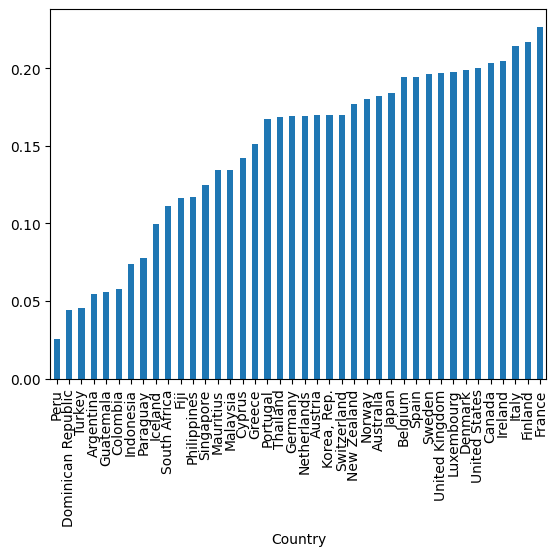

In [14]:
pd.Series(model.all_eigenvectors[:, 0], index = model.data_wide_columns).sort_values().plot.bar()

PC1 dominated by Peru and Argentina

# 3. Evaluation

In [15]:
df_inflation["Country"].unique()

array(['Spain', 'Guatemala', 'Australia', 'Dominican Republic',
       'New Zealand', 'Italy', 'Sweden', 'Colombia', 'Paraguay', 'Peru',
       'Belgium', 'Denmark', 'United States', 'Philippines', 'Indonesia',
       'Japan', 'Finland', 'Norway', 'Greece', 'Austria', 'South Africa',
       'France', 'Mauritius', 'Luxembourg', 'Switzerland', 'Singapore',
       'Malaysia', 'Fiji', 'Turkey', 'Netherlands', 'Korea, Rep.',
       'Thailand', 'Canada', 'Ireland', 'Germany', 'United Kingdom',
       'Portugal', 'Cyprus', 'Iceland', 'Argentina'], dtype=object)

In [16]:
preds = model.predict(df_inflation)
preds

,yearmonth,Country,inflation
8280,2023-04-01,Argentina,0.116093
8281,2023-04-01,Australia,0.016255
8282,2023-04-01,Austria,0.011509
8283,2023-04-01,Belgium,0.013185
8284,2023-04-01,Canada,0.013331
8285,2023-04-01,Colombia,0.042226
8286,2023-04-01,Cyprus,0.013014
8287,2023-04-01,Denmark,0.015311
8288,2023-04-01,Dominican Republic,0.016038
8289,2023-04-01,Fiji,0.016476


# 4. H-period ahead forecasting

In [17]:
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
8537,ESP,184,Spain,1970-04-01,0.000000
11635,GTM,258,Guatemala,1970-04-01,0.012577
1231,AUS,193,Australia,1970-04-01,0.011236
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
21697,NZL,196,New Zealand,1970-04-01,0.015421
...,...,...,...,...,...
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
15095,JPN,158,Japan,2023-01-01,0.004500
14347,ITA,136,Italy,2023-01-01,0.003938
21470,NOR,142,Norway,2023-01-01,0.006886


In [18]:
from seminartools.models.utils import h_period_ahead_forecast

forecast = h_period_ahead_forecast(model, df_inflation, "2020-01-01", h=3)
forecast

,yearmonth,Country,inflation
0,2020-01-01,Argentina,0.063132
1,2020-01-01,Australia,0.006336
2,2020-01-01,Austria,0.004518
3,2020-01-01,Belgium,0.004393
4,2020-01-01,Canada,0.004178
...,...,...,...
515,2023-01-01,Switzerland,0.010895
516,2023-01-01,Thailand,0.020305
517,2023-01-01,Turkey,0.082236
518,2023-01-01,United Kingdom,0.025200


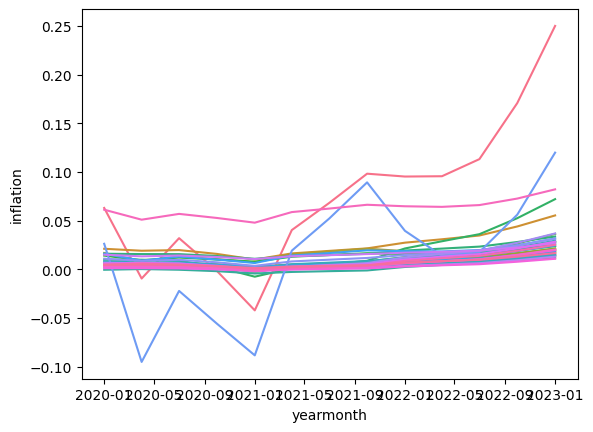

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(
    data = forecast,
    x = "yearmonth",
    y = "inflation",
    hue = "Country"
)
# turn off legend
plt.legend().remove()

# 5. Compare the forecast with the actual data

In [20]:
forecast_merged = forecast.copy().rename(columns={"inflation": "pred"})
forecast_merged = forecast_merged.merge(
    df_inflation[["Country", "yearmonth", "inflation"]],
    on=["Country", "yearmonth"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_merged.tail(100)

,yearmonth,Country,pred,actual
420,2022-07-01,"Korea, Rep.",0.015613,0.011352
421,2022-07-01,Luxembourg,0.009099,0.002584
422,2022-07-01,Malaysia,0.007944,0.011845
423,2022-07-01,Mauritius,0.016694,0.023855
424,2022-07-01,Netherlands,0.009305,0.040519
...,...,...,...,...
515,2023-01-01,Switzerland,0.010895,0.010084
516,2023-01-01,Thailand,0.020305,0.000463
517,2023-01-01,Turkey,0.082236,0.116249
518,2023-01-01,United Kingdom,0.025200,0.008814


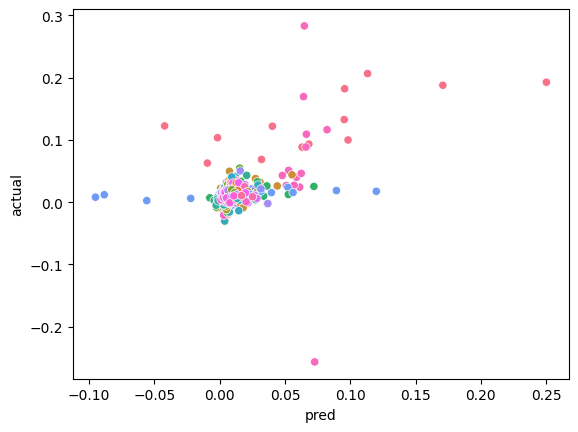

In [21]:
sns.scatterplot(
    data = forecast_merged,
    x = "pred",
    y = "actual",
    hue = "Country"
)
plt.legend().remove()

In [22]:
import statsmodels.api as sm

sm.OLS(
    forecast_merged["actual"], sm.add_constant(forecast_merged["pred"])
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     195.0
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           7.77e-38
Time:                        13:16:12   Log-Likelihood:                 1170.0
No. Observations:                 520   AIC:                            -2336.
Df Residuals:                     518   BIC:                            -2327.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0058      0.001      4.508      0.000       0.003       0.008
pred           0.7164      0.051     13.963      0.000       0.616       0.817
==============================================================================
Omnibus:                      268.285   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78744.668
Skew:                          -0.972   Prob(JB):                         0.00
Kurtosis:                      63.254   Cond. No.                         45.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model.var.models["PC1"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PC1   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     114.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           3.78e-70
Time:                        13:16:31   Log-Likelihood:                -408.92
No. Observations:                 208   AIC:                             835.8
Df Residuals:                     199   BIC:                             865.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0075      0.123     -0.061      0.951      -0.249       0.234
PC1_lag_1      0.5516      0.069      8.045      0.000       0.416       0.687
PC2_lag_1     -0.4628      0.121     -3.826      0.000      -0.701      -0.224
PC1_lag_2      0.1179      0.079      1.502      0.135      -0.037       0.273
PC2_lag_2      0.0399      0.144      0.278      0.781      -0.243       0.323
PC1_lag_3      0.0561      0.079      0.713      0.477      -0.099       0.211
PC2_lag_3      0.2156      0.143      1.509      0.133      -0.066       0.497
PC1_lag_4      0.2194      0.067      3.260      0.001       0.087       0.352
PC2_lag_4      0.2244      0.126      1.780      0.077      -0.024       0.473
==============================================================================
Omnibus:                       22.963   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.885
Skew:                           0.418   Prob(JB):                     2.21e-14
Kurtosis:                       5.561   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""